In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [17]:
# Display the first few rows of the dataset
print(data.head())

   Temperature  Humidity  Light_Hours  Hen_Age_weeks  Feed_Quantity  \
0         28.1      65.3    15.997205             17          0.075   
1         26.7      68.2    13.935016             17          0.075   
2         23.5      72.1    15.508329             17          0.075   
3         29.9      60.8    12.014510             17          0.075   
4         22.2      73.9    12.643045             17          0.075   

   Hen_Count  Egg_count  Health_Status_Sick  
0       2021          3               False  
1       2002          3               False  
2       1980          3               False  
3       2019          3               False  
4       1998          3               False  


In [4]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# Handling missing values (if any)
data = data.dropna()

In [33]:
#
data.isna().sum()

Temperature           0
Humidity              0
Light_Hours           0
Hen_Age_weeks         0
Feed_Quantity         0
Hen_Count             0
Egg_count             0
Health_Status_Sick    0
dtype: int64

In [7]:
# Encoding categorical variables
data = pd.get_dummies(data, columns=['Health_Status'], drop_first=True)

In [8]:
data.head()

,Temperature,Humidity,Light_Hours,Hen_Age_weeks,Feed_Quantity,Hen_Count,Egg_count,Health_Status_Sick
0,28.1,65.3,15.997205,17,0.075,2021,3,False
1,26.7,68.2,13.935016,17,0.075,2002,3,False
2,23.5,72.1,15.508329,17,0.075,1980,3,False
3,29.9,60.8,12.014510,17,0.075,2019,3,False
4,22.2,73.9,12.643045,17,0.075,1998,3,False


In [9]:
# Selecting features and target variable
features = ['Temperature', 'Humidity', 'Light_Hours', 'Hen_Age_weeks', 'Feed_Quantity', 'Hen_Count', 'Health_Status_Sick']
target = 'Egg_count'

In [10]:
X = data[features]
y = data[target]

In [11]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Normalizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Step 4: Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
# Step 5: Make Predictions
y_pred = model.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4645.858196575341


In [32]:
# Step 7: Make Predictions on New Data
# Example new data (ensure it is preprocessed similarly)
new_data = pd.DataFrame({
    'Temperature': [23],
    'Humidity': [65.1],
    'Light_Hours': [15.9],
    'Hen_Age_weeks': [70],
    'Feed_Quantity': [0.1],
    'Health_Status': [1],
    'Hen_Count': [2021]
})

# Make predictions
new_predictions = model.predict(new_data)
print(f"Predicted Egg Count: {new_predictions[0]}")

Predicted Egg Count: 1054.14


C:\Program Files\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


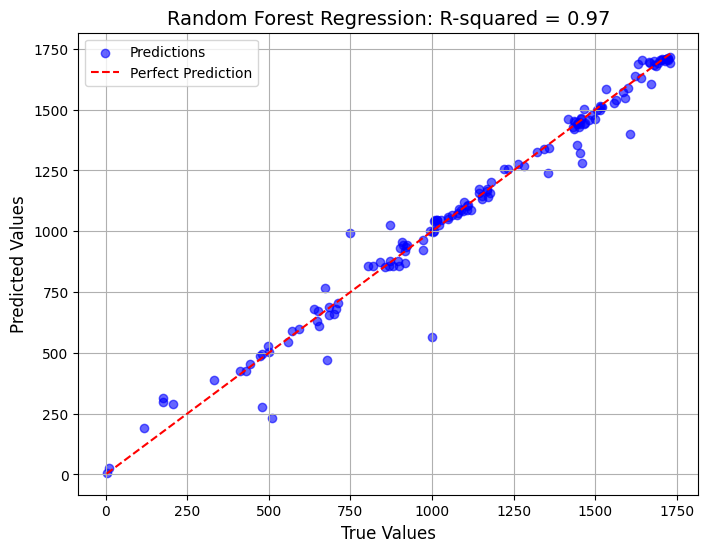

In [30]:
# Calculate R-squared value
r2 = r2_score(y_test, y_pred)

# Scatter plot of true vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title(f'Random Forest Regression: R-squared = {r2:.2f}', fontsize=14)
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()